# Tree Modeling

For this exercise, I am developing a tree model to predict whether a baseball player will continue to play in 2019. 

1) Load and clean the data

2) Construct a tree model that is constrained by depth

3) Inspect the resulting tree graph

4) What do you learn from the model?

5) What are the most important features?

6) What kinds of paths are there for the two outcomes (continuing in 2019 or not)?

7) Consider model predictions. For the features in your model, imagine a player with a certain set of values (for example, 20 runs, 50 games, etc.). 

8) What outcome would the model predict? And how much confidence does the model suggest for this prediction?

In [115]:
#import all libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

from sklearn.model_selection import train_test_split

# Loading and Clean Data 

In [116]:
#load data
df = pd.read_csv('predicting_inleague.csv')
print(df.shape)
df.head()

(1957, 53)


,playerID,inleague_2019,G_2016,G_2017,G_2018,AB_2016,AB_2017,AB_2018,R_2016,R_2017,...,HBP_2018,SH_2016,SH_2017,SH_2018,SF_2016,SF_2017,SF_2018,GIDP_2016,GIDP_2017,GIDP_2018
0,abadfe01,1.0,39.0,48.0,NaN,1.0,0.0,NaN,0.0,0.0,...,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN
1,abreujo02,1.0,159.0,156.0,128.0,624.0,621.0,499.0,67.0,95.0,...,11.0,0.0,0.0,0.0,9.0,4.0,6.0,21.0,21.0,14.0
2,acunaro01,1.0,NaN,NaN,111.0,NaN,NaN,433.0,NaN,NaN,...,6.0,NaN,NaN,0.0,NaN,NaN,3.0,NaN,NaN,4.0
3,adamecr01,1.0,121.0,12.0,NaN,225.0,13.0,NaN,25.0,1.0,...,NaN,3.0,0.0,NaN,0.0,0.0,NaN,5.0,0.0,NaN
4,adamewi01,1.0,NaN,NaN,85.0,NaN,NaN,288.0,NaN,NaN,...,1.0,NaN,NaN,1.0,NaN,NaN,2.0,NaN,NaN,6.0


In [117]:
df.inleague_2019.value_counts()

1.0    1139
0.0     818
Name: inleague_2019, dtype: int64

In [118]:
df.describe()

,inleague_2019,G_2016,G_2017,G_2018,AB_2016,AB_2017,AB_2018,R_2016,R_2017,R_2018,...,HBP_2018,SH_2016,SH_2017,SH_2018,SF_2016,SF_2017,SF_2018,GIDP_2016,GIDP_2017,GIDP_2018
count,1957.000000,1353.000000,1358.000000,1379.000000,1353.000000,1358.000000,1379.000000,1353.000000,1358.000000,1379.000000,...,1379.000000,1353.000000,1358.000000,1379.000000,1353.000000,1358.000000,1379.000000,1353.00000,1358.000000,1379.000000
mean,0.582013,50.297118,50.073638,49.889775,120.113821,119.182622,116.930384,15.797487,16.259941,15.282814,...,1.358956,0.738359,0.670839,0.589558,0.882483,0.843888,0.870196,2.70510,2.729750,2.432922
std,0.493354,46.321207,45.810965,45.378646,183.536984,181.129561,178.165114,26.674325,27.080453,25.750868,...,2.891271,1.615700,1.582854,1.433502,1.746153,1.680638,1.737858,4.75489,4.768001,4.275572
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,14.000000,13.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,1.000000,33.000000,32.000000,33.000000,15.000000,13.000000,11.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,1.000000,73.000000,73.000000,73.000000,185.000000,178.750000,182.000000,21.000000,22.750000,20.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,3.00000,4.000000,3.000000
max,1.000000,162.000000,162.000000,162.000000,672.000000,662.000000,664.000000,123.000000,137.000000,129.000000,...,22.000000,13.000000,14.000000,12.000000,15.000000,12.000000,11.000000,26.00000,26.000000,23.000000


In [119]:
#clean data 
df.isnull().sum()

playerID           0
inleague_2019      0
G_2016           604
G_2017           599
G_2018           578
AB_2016          604
AB_2017          599
AB_2018          578
R_2016           604
R_2017           599
R_2018           578
H_2016           604
H_2017           599
H_2018           578
2B_2016          604
2B_2017          599
2B_2018          578
3B_2016          604
3B_2017          599
3B_2018          578
HR_2016          604
HR_2017          599
HR_2018          578
RBI_2016         604
RBI_2017         599
RBI_2018         578
SB_2016          604
SB_2017          599
SB_2018          578
CS_2016          604
CS_2017          599
CS_2018          578
BB_2016          604
BB_2017          599
BB_2018          578
SO_2016          604
SO_2017          599
SO_2018          578
IBB_2016         604
IBB_2017         599
IBB_2018         578
HBP_2016         604
HBP_2017         599
HBP_2018         578
SH_2016          604
SH_2017          599
SH_2018          578
SF_2016      

In [120]:
#Filling in missing values with 0 
df.fillna(0, inplace=True)

In [121]:
#making sure all data has been cleaned 
df.isnull().sum()

playerID         0
inleague_2019    0
G_2016           0
G_2017           0
G_2018           0
AB_2016          0
AB_2017          0
AB_2018          0
R_2016           0
R_2017           0
R_2018           0
H_2016           0
H_2017           0
H_2018           0
2B_2016          0
2B_2017          0
2B_2018          0
3B_2016          0
3B_2017          0
3B_2018          0
HR_2016          0
HR_2017          0
HR_2018          0
RBI_2016         0
RBI_2017         0
RBI_2018         0
SB_2016          0
SB_2017          0
SB_2018          0
CS_2016          0
CS_2017          0
CS_2018          0
BB_2016          0
BB_2017          0
BB_2018          0
SO_2016          0
SO_2017          0
SO_2018          0
IBB_2016         0
IBB_2017         0
IBB_2018         0
HBP_2016         0
HBP_2017         0
HBP_2018         0
SH_2016          0
SH_2017          0
SH_2018          0
SF_2016          0
SF_2017          0
SF_2018          0
GIDP_2016        0
GIDP_2017        0
GIDP_2018   

# Creating Correlation to Visualize Best Predicting Variables Being In League in 2019?


In [122]:
df.corr()[['inleague_2019']].sort_values(by='inleague_2019', ascending = False).head()


,inleague_2019
inleague_2019,1.000000
G_2018,0.502301
SO_2018,0.364810
AB_2018,0.360322
H_2018,0.348005


# Constructing Decision Tree Model 
Construct a decision tree model that is constrained by depth

In [123]:
# split out your target feature and your other features that you will use to predict the target
xcols = df.columns[2 : len(df.columns)].to_list()
X, y = df[xcols], df[['inleague_2019']]
print('X shape:', X.shape, '\ny shape:', y.shape)

X shape: (1957, 51) 
y shape: (1957, 1)


In [124]:
#fit the decision tree and output accuracy
clf = DecisionTreeClassifier(criterion='entropy').fit(X, y)
print('Accuracy of Decision Tree classifier: {:.2f}'
     .format(clf.score(X, y)))

Accuracy of Decision Tree classifier: 0.99


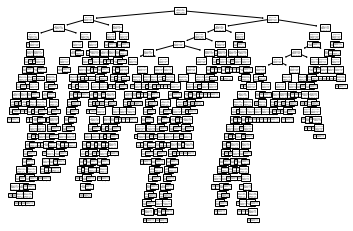

In [125]:
# plot the entire decision tree
plot_tree(clf)
plt.show()

In [126]:
#print the decision tree as formatted text
from sklearn.tree import export_text
r = export_text(clf, feature_names=xcols)
print(r)

|--- G_2018 <= 2.50
|   |--- G_2018 <= 0.50
|   |   |--- G_2017 <= 3.50
|   |   |   |--- G_2016 <= 2.50
|   |   |   |   |--- class: 0.0
|   |   |   |--- G_2016 >  2.50
|   |   |   |   |--- SO_2016 <= 3.50
|   |   |   |   |   |--- 2B_2016 <= 1.50
|   |   |   |   |   |   |--- G_2016 <= 31.00
|   |   |   |   |   |   |   |--- G_2016 <= 18.50
|   |   |   |   |   |   |   |   |--- G_2016 <= 5.50
|   |   |   |   |   |   |   |   |   |--- G_2017 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- AB_2016 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- AB_2016 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |   |   |--- G_2017 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- AB_2016 <= 1.00
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |   |   |   |--- AB_2016 >  1.00
|   |   |   |   |   |   |   |   |   |   |   |--- trunca

PermissionError: [Errno 13] Permission denied: 'decision_tree.pdf'

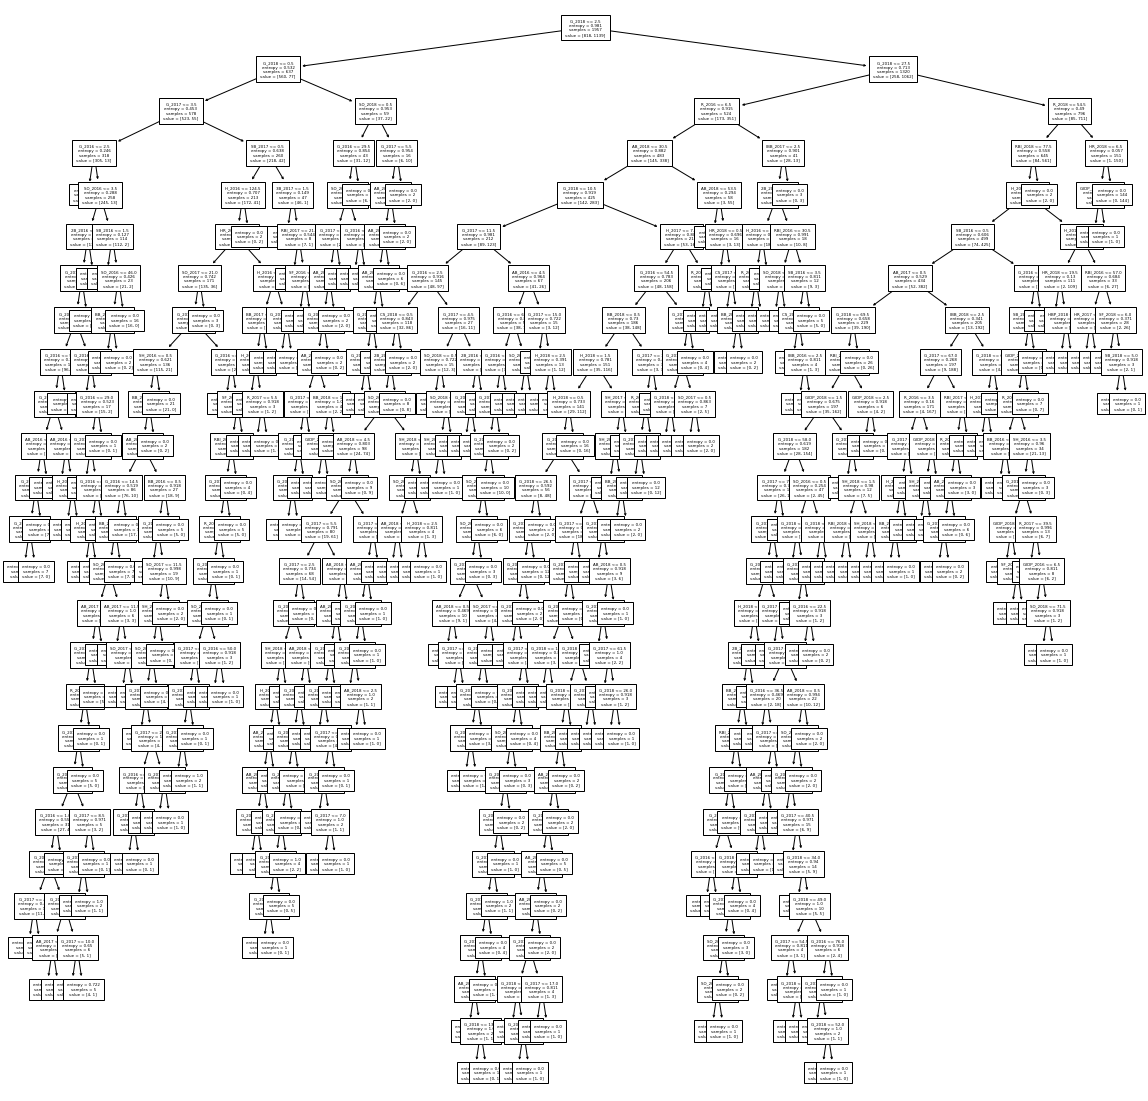

In [127]:
#save the figure to a pdf for closer inspection

f = plt.figure(figsize=[20, 20])
plot_tree(clf, feature_names=xcols, fontsize=4)
f.savefig("decision_tree.pdf", bbox_inches='tight')

Decision Tree Inspection Summary: 

We are using Informational Entropy in this excersies. Which looks at how much variancve is in data. 

    Root Node: G_2018 <= 2.5 with 0.981 entropy with data sample = 1957
    
    If the data in G_2018 is above 2.5 then the model checks G_2018 again and checks if its below <= 27.5. At this point the data has enthropy of 0.713 with data sample = 1320. The decision tree model then splits the data into R_2016 and R-2018. 
    
    If the root node G_2018 was below 2.5 then it checkes the data again to see if its below <=0.5. The entropy at this node is 0.0532 with data sample = 637. The decision tree model then splits the data into G_2017 and SO_2018. 
    
    

In [128]:
# summarize feature importance, and store values under feature names in scores dictionary
importance = clf.feature_importances_
scores = {}
for i,v in enumerate(importance):
    #print('Feature: %s, Score: %.5f' % (xcols[i],v))
    scores[xcols[i]] = v

#reverse sort 'scores' dictionary by values
import operator
sorted_scores = sorted(scores.items(), key=operator.itemgetter(1),reverse=True)

#print top 10 features
for feature, score in sorted_scores[0:10]:
    print(feature, ':', score)

G_2018 : 0.4636561394601109
G_2017 : 0.10225336438019467
G_2016 : 0.07789051055304817
AB_2018 : 0.032623511324448226
SO_2017 : 0.021194495809063
SO_2018 : 0.018744090384847766
GIDP_2018 : 0.01841730806733562
R_2018 : 0.017656683436378988
H_2018 : 0.017567777393378958
AB_2016 : 0.016325763954167592


<ipython-input-129-f0176acb5b8d>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels = top_feats, rotation=45)


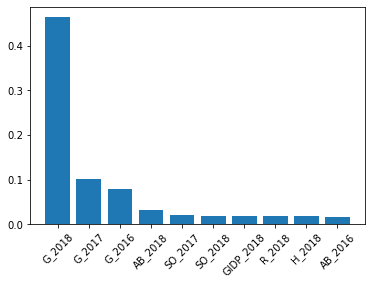

In [129]:
# first extract the top ten features into two lists that can be passed to plotting function
top_feats, top_vals = [], []
for feat_name, value in sorted_scores[0 : 10]:
    top_feats.append(feat_name)
    top_vals.append(value)

# plot feature importance for top 10 features
# plotting function
fig, ax = plt.subplots(1, 1)
feats_plot = ax.bar(top_feats, top_vals)
ax.set_xticklabels(labels = top_feats, rotation=45)
plt.show()

Important variable summary

The model found that the following players metrics are important: 

    - Games played in 2018
    - Games played in 2017
    - Games played in 2016
    - At Bats in 2018 
    - Runs in 2016 
    - Runs in 2018 
    - Hits in 2017 
    - At Bats in 2016 
    - Stolen Bases in 2016 
    - At Bats in 2017 


# Creating Training and Test sets.
    A training set - a subset to train a model 
    A test set - a subset to test the trained model. 

In [130]:
# train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[xcols], df[['inleague_2019']], 
                                                    random_state=0)
print(X_train.shape)
print(X_test.shape,'\n')

clf = DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train)

print('Accuracy of classifier on training set: {:.2f}'
         .format(clf.score(X_train, y_train)))
print('Accuracy of classifier on test set: {:.2f}'
         .format(clf.score(X_test, y_test)))

(1467, 51)
(490, 51) 

Accuracy of classifier on training set: 0.99
Accuracy of classifier on test set: 0.74


In [131]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)


In [133]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[130  64]
 [ 68 228]]
              precision    recall  f1-score   support

         0.0       0.66      0.67      0.66       194
         1.0       0.78      0.77      0.78       296

    accuracy                           0.73       490
   macro avg       0.72      0.72      0.72       490
weighted avg       0.73      0.73      0.73       490



From the confusion matrix, you can see that of 490 test instance, our algorithm misclassified 132 instances. This is 73.5% accurancy. Which is not too bad but not great. 
    
    

In [ ]:
# limit tree complexity
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3).fit(X_train, y_train)

print('Accuracy of classifier on training set: {:.2f}'
         .format(clf.score(X_train, y_train)))
print('Accuracy of classifier on test set: {:.2f}'
         .format(clf.score(X_test, y_test)))

plot_tree(clf, feature_names=xcols, fontsize=4)
print('\nyou can see the constrained tree depth')

In [94]:
r = export_text(clf, feature_names=xcols)
print(r)

|--- G_2018 <= 1.50
|   |--- G_2017 <= 5.50
|   |   |--- AB_2018 <= 0.50
|   |   |   |--- class: 0.0
|   |   |--- AB_2018 >  0.50
|   |   |   |--- class: 1.0
|   |--- G_2017 >  5.50
|   |   |--- SB_2017 <= 0.50
|   |   |   |--- class: 0.0
|   |   |--- SB_2017 >  0.50
|   |   |   |--- class: 0.0
|--- G_2018 >  1.50
|   |--- G_2018 <= 9.50
|   |   |--- G_2016 <= 8.50
|   |   |   |--- class: 1.0
|   |   |--- G_2016 >  8.50
|   |   |   |--- class: 0.0
|   |--- G_2018 >  9.50
|   |   |--- H_2018 <= 53.50
|   |   |   |--- class: 1.0
|   |   |--- H_2018 >  53.50
|   |   |   |--- class: 1.0



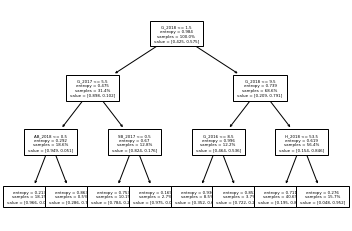

In [95]:
#examine proportions to get probabilities
f = plt.figure()
plot_tree(clf, feature_names=xcols, fontsize=4, proportion=True)
f.savefig("decision_tree_depth3.pdf", bbox_inches='tight')

# Paths Outcomes: 
   
From the above constrained tree by depth, there are several paths that predict wherther the player will make in inleague or not in 2019. 


If the player had more than 9.5 games in 2018 and more than 53.5 home runs then the player is likely to continue inleague in 2019.  

If the player had more than 9.5 games in 2018 and more than 8.5 games in 2016 then the player is likely to continue inleague in 2019.  

If the player had less than 1.5 games in 2018 and more than 5.5 games in 2017 and had more than 0.5 At bats in 2018 then the player is likely to continue inleague in 2019. 


In general players that play more games across the years are more likely to continue inleague in 2019


In [96]:
# let's work w/ a simpler set of features to look at prediction
xcols2 = ['R_2018', 'G_2018', 'SO_2018']
X2 = df[xcols2]
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3).fit(X2, y)
print('Accuracy of Decision Tree classifier: {:.2f}'
     .format(clf.score(X2, y)))

Accuracy of Decision Tree classifier: 0.83


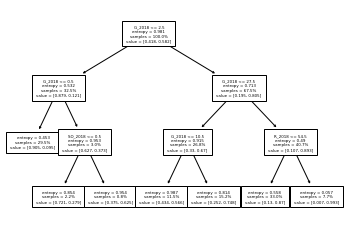

In [97]:
#output the decision trees w/ proportions
f = plt.figure()
plot_tree(clf, feature_names=xcols2, fontsize=4, proportion=True)
f.savefig("decision_tree_3features.pdf", bbox_inches='tight')

# Paths Outcomes: 
   
From the above constrained tree by depth, there are several paths that predict wherther the player will make in inleague or not in 2019. 


If the player has more than 27.5 games in 2018 and more than 54.5 runs in 2018 then outr model will predict that they are going to be in the inleague in 2019. 

If the player has more than 10.5 but less than 27.5 games in 2018 then the player will be predicted to be in inleague. 

Typically if the player who played in lot of games across multiple years will be inleague, and people who didn't play in many games will not


In [59]:
#make some predictions
print('prediction for 20 runs, 50 games, 1 strikeouts')
print(clf.predict([[20,50,1]]), clf.predict_proba([[20,50,1]]))
print('prediction for 10 runs, 0 games, 0 strikeouts')
print(clf.predict([[10,0,0]]), clf.predict_proba([[10,0,0]]))
print('prediction for 80 runs, 100 games, 0 strikeouts')
print(clf.predict([[80,100,0]]), clf.predict_proba([[80,100,0]]))

prediction for 20 runs, 50 games, 1 strikeouts
[1.] [[0.13023256 0.86976744]]
prediction for 10 runs, 0 games, 0 strikeouts
[0.] [[0.90484429 0.09515571]]
prediction for 80 runs, 100 games, 0 strikeouts
[1.] [[0.00662252 0.99337748]]
